# 0. Introduction

## Question 1: list as many use cases for the dataset as possible
Use case 1: predict the car price, so that the revenue margin could be maximized

Use case 2: together with customer information, such as car preference, a recommendation system could be realized

Use case 3：symboling is the risk factor symbol associated with its price, so symboling estimation/prediction could be useful for the risk estimation. 

## Question 2: Pick one of the use cases you listed in question 1 and describe how building a statistical model based on the dataset could best be used to improve Auto1’s business.
Here in this notebook I decide to predict the prices of the cars, given the various attributes of the cars.

## Question 3: Implement
Please refer to the python code in this notebook.

## Question 4: 
### A. Explain every design choices
Please refer to the descriptions, notes, and the comments in and around the python code.
### B. How to improve the model given more time
Because the dataset contains relative many attributes, when given more time and more data, other approaches, such as random forest, could be implemented and evaluated. 

# 1. Import libraries

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

# 2. Data exploration

In [145]:
pd.options.display.max_columns = None # display all the columns of a dataframe
df_car = pd.read_csv('C:\\Downloads\Auto1-DS-TestData.csv')

In [81]:
df_car.shape

(205, 26)

## Check the missing data

In [138]:
for col in df_car.columns:
    print(20*'-')
    print("Attribute: ", col)
    #print("Has NaN?: ", df_car[col].hasnans)
    if df_car[col].hasnans == True:
        print("Has NaN values")
    #print("Unique Values: ", df_car[col].unique())
    if '?' in df_car[col].unique():
        print("Has '?' symbols")
        
clear_output()

In [141]:
df_car.loc[df_car['normalized-losses'] == '?']
clear_output()

In [75]:
df_car.loc[df_car['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [139]:
df_car.loc[df_car['bore'] == '?']
clear_output()

In [140]:
df_car.loc[df_car['stroke'] == '?']
clear_output()

In [78]:
df_car.loc[df_car['horsepower'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [80]:
df_car.loc[df_car['peak-rpm'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [73]:
df_car.loc[df_car['price'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


## Fix the missing data

### Normalized-losses
The attribute "normalized-losses" has too much missing data (20%), therefore it is discarded. 

In [111]:
df_complete = df_car.copy(deep=True) # make a deep copy, so that the df_car won't be modified

### num-of-doors

In [112]:
df_car.loc[(df_car['make']=='dodge') & (df_car['body-style']=='sedan')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
26,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


In [124]:
df_complete.set_value(27, 'num-of-doors', 'four')
clear_output(wait=True)

In [129]:
df_car.loc[(df_car['make']=='mazda') & (df_car['body-style']=='sedan')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
60,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8495
62,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
65,0,118,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280
66,0,?,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344


In [132]:
df_complete.set_value(63, 'num-of-doors', 'four')
clear_output(wait=True)
#df_complete.loc[(df_complete['make']=='mazda') & (df_complete['body-style']=='sedan')]

### Bore and Stroke
It is hard to find out the relation to other values, so skip them

In [137]:
df_car.loc[(df_car['make']=='mazda') & (df_car['body-style']=='hatchback')]
df_car.loc[(df_car['fuel-system']=='4bbl') & (df_car['body-style']=='hatchback')]
df_car['bore'].unique()
clear_output()

### Horsepower and Peak-RPM

Here only horsepower is considered, peak-rpm will be discarded

In [150]:
df_car.loc[(df_car['make']=='renault')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [180]:
df_wagon_gas = df_car.loc[(df_car['body-style']=='wagon') & (df_car['fuel-type']=='gas') & 
                          (df_car['engine-type']=='ohc')]
# select the attributes, which are relevant to the horsepower and peak-rpm
df_wagon_gas_eng = df_wagon_gas[['engine-type','num-of-cylinders','engine-size','horsepower','peak-rpm']]
# only consider the records that have engine-size > 120
df_wagon_gas_eng_120 = df_wagon_gas_eng[df_wagon_gas_eng['engine-size']>120]
df_wge120_sub = df_wagon_gas_eng_120[df_wagon_gas_eng_120['horsepower']!='?']
# get the horsepower, whose type is object, not numeric
df_wge120_hp = df_wge120_sub['horsepower']
# get the mean of the horsepower
hp_mean = pd.to_numeric(df_wge120_hp).mean()

In [183]:
df_complete.set_value(130, 'horsepower', hp_mean)
df_complete[df_complete['make']=='renault']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,112.667,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


### Notes:
Following the same approach, the missing
horsepower value for record 131 could be computed. Atcually, these are the only two records about the renault cars. Therefore, these two records are discarded for the rest of this work!

## Check correlations between different attributes

In [203]:
df_less_attr = df_complete.drop(['normalized-losses','num-of-doors','drive-wheels','engine-location',
                                         'bore','stroke','peak-rpm'], axis=1)
# drop the renault records and the records with missing prices
df_less_attr_row = df_less_attr.drop([130,131,9,44,45,129])


In [206]:
df_less_attr_row.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
body-style            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
compression-ratio    float64
horsepower             int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [207]:
# convert horsepower and price to numeric values
df_less_attr_row[['horsepower','price']]=df_less_attr_row[['horsepower','price']].apply(pd.to_numeric)

In [208]:
df_less_attr_row.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,-0.537706,-0.365957,-0.243933,-0.546717,-0.232893,-0.111110,-0.182446,0.076038,-0.035228,0.036293,-0.082465
wheel-base,-0.537706,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.249088,0.371621,-0.472877,-0.543647,0.583797
length,-0.365957,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.161486,0.580309,-0.664865,-0.699033,0.693965
width,-0.243933,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.191254,0.615315,-0.633139,-0.681131,0.753871
height,-0.546717,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.259914,-0.087407,-0.051387,-0.105200,0.134990
curb-weight,-0.232893,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.156294,0.758063,-0.750287,-0.794937,0.835090
engine-size,-0.111110,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.029366,0.822713,-0.650552,-0.679688,0.873887
compression-ratio,-0.182446,0.249088,0.161486,0.191254,0.259914,0.156294,0.029366,1.000000,-0.214576,0.330587,0.268819,0.069549
horsepower,0.076038,0.371621,0.580309,0.615315,-0.087407,0.758063,0.822713,-0.214576,1.000000,-0.822617,-0.804596,0.810533
city-mpg,-0.035228,-0.472877,-0.664865,-0.633139,-0.051387,-0.750287,-0.650552,0.330587,-0.822617,1.000000,0.972777,-0.689253


### Notes:
Results show that symboling, height, compression-ratio and wheel-base have very weak correlation with price, therefore they are dropped!

In [214]:
df_lesser = df_less_attr_row.drop(['symboling', 'height', 'compression-ratio','wheel-base'], axis=1)
df_lesser.corr()

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price
length,1.000000,0.857225,0.881688,0.685260,0.580309,-0.664865,-0.699033,0.693965
width,0.857225,1.000000,0.866965,0.729466,0.615315,-0.633139,-0.681131,0.753871
curb-weight,0.881688,0.866965,1.000000,0.849301,0.758063,-0.750287,-0.794937,0.835090
engine-size,0.685260,0.729466,0.849301,1.000000,0.822713,-0.650552,-0.679688,0.873887
horsepower,0.580309,0.615315,0.758063,0.822713,1.000000,-0.822617,-0.804596,0.810533
city-mpg,-0.664865,-0.633139,-0.750287,-0.650552,-0.822617,1.000000,0.972777,-0.689253
highway-mpg,-0.699033,-0.681131,-0.794937,-0.679688,-0.804596,0.972777,1.000000,-0.705230
price,0.693965,0.753871,0.835090,0.873887,0.810533,-0.689253,-0.705230,1.000000


In [215]:
# check the correlation between curb-weight, engine-size, horsepower
df_lesser[['curb-weight','engine-size','horsepower']].corr()

,curb-weight,engine-size,horsepower
curb-weight,1.000000,0.849301,0.758063
engine-size,0.849301,1.000000,0.822713
horsepower,0.758063,0.822713,1.000000


### Notes:
curb-weight, engine-size, and horsepower all have strong correlation with price, and they themselves also have strong correlation with each other, therefore we only keep engine-size

similarly, city-mpg is dropped because it is strongly correlated with highway-mpg

length is dropped because it is strongly correlated with width

In [219]:
df_lesser_less = df_lesser.drop(['curb-weight','horsepower', 'city-mpg', 'length'],axis=1)
df_lesser_less.corr()

,width,engine-size,highway-mpg,price
width,1.000000,0.729466,-0.681131,0.753871
engine-size,0.729466,1.000000,-0.679688,0.873887
highway-mpg,-0.681131,-0.679688,1.000000,-0.705230
price,0.753871,0.873887,-0.705230,1.000000


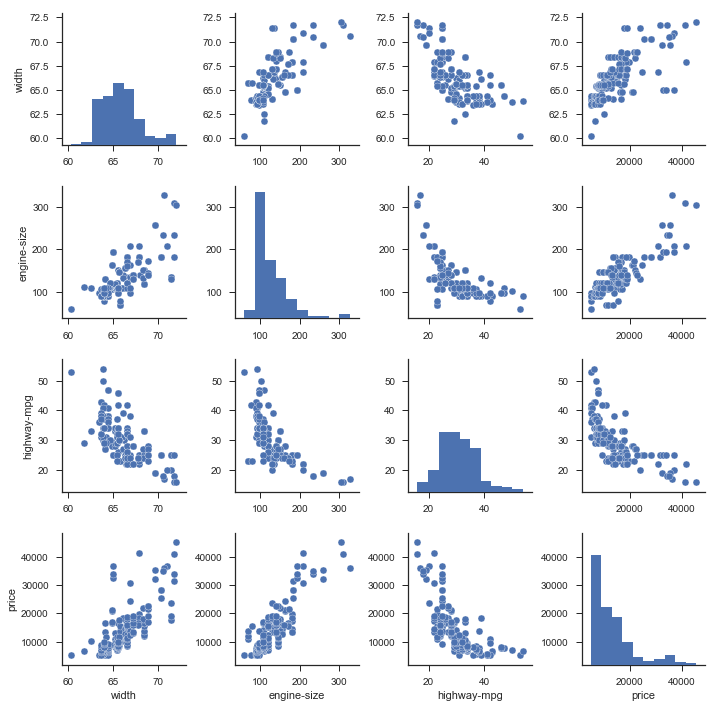

In [229]:
g = sns.pairplot(df_lesser_less)
#g = sns.pairplot(df_lesser_less[['width','price']])
plt.show()

# 3. Model

## Prepare training, cross-validation, and test data

In [274]:
df_final = df_lesser_less.copy(deep=True)
# reset the index of the dataframe
df_final=df_final.reset_index(drop=True)
df_final.columns=['make','fuelType','aspiration','bodyStyle','width','engineType','numCylinders','engineSize','fuelSystem','highwayMpg','price']
df_final.head()

,make,fuelType,aspiration,bodyStyle,width,engineType,numCylinders,engineSize,fuelSystem,highwayMpg,price
0,alfa-romero,gas,std,convertible,64.1,dohc,four,130,mpfi,27,13495
1,alfa-romero,gas,std,convertible,64.1,dohc,four,130,mpfi,27,16500
2,alfa-romero,gas,std,hatchback,65.5,ohcv,six,152,mpfi,26,16500
3,audi,gas,std,sedan,66.2,ohc,four,109,mpfi,30,13950
4,audi,gas,std,sedan,66.4,ohc,five,136,mpfi,22,17450


In [276]:
# create random number 
n=df_final.shape[0]
np.random.seed(1234)
shuffle = np.arange(n)
print('Before:')
print(shuffle)
np.random.shuffle(shuffle)
print('After:')
print(shuffle)

Before:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198]
After:
[196 159  31  48  63  59   5   7 155 108 153  54 102 130 179 190 125  29
  74  65 132 101 170  51  92 111   9 137 186  40   6 176 149 144 122 161
  93 182 169  58 145  32  43  

In [277]:
# We split the data into training data (80%), validation data (10%), and test data(10%)
cut1=int(round(n*0.8))
cut2=cut1+int(round(n*0.1))
train_indices = shuffle[0:cut1]
validation_indices = shuffle[cut1:cut2]
test_indices = shuffle[cut2:]
print("Training: ",len(train_indices))
print("Validation: ",len(validation_indices))
print("Test: ",len(test_indices))
n == (len(train_indices)+len(validation_indices)+len(test_indices)) ## check if data split is correct

Training:  159
Validation:  20
Test:  20


True

In [278]:
train = df_final.iloc[train_indices,]
validation=df_final.iloc[validation_indices,]
test = df_final.iloc[test_indices,]
print(train.shape)
print(validation.shape)
print(test.shape)

(159, 11)
(20, 11)
(20, 11)


## Model training

In [279]:
train.head()

,make,fuelType,aspiration,bodyStyle,width,engineType,numCylinders,engineSize,fuelSystem,highwayMpg,price
196,volvo,gas,std,sedan,68.9,ohcv,six,173,mpfi,23,21485
159,toyota,gas,std,sedan,64.0,dohc,four,98,mpfi,29,9298
31,honda,gas,std,hatchback,64.0,ohc,four,79,1bbl,42,5399
48,mazda,gas,std,hatchback,64.2,ohc,four,91,2bbl,38,6095
63,mazda,diesel,std,sedan,66.1,ohc,four,134,idi,39,18344


In [288]:
# define the model
#linear_model_formula ="price ~ C(make) + C(fuelType)+ C(aspiration) + C(bodyStyle) + width + C(engineType) + C(numCylinders) + engineSize + C(fuelSystem) + highwayMpg"
linear_model_formula ="price ~  C(fuelType) + C(aspiration) + width + engineSize + highwayMpg"
linear_model = smf.ols(formula=linear_model_formula, data=train)
#print(type(linear_model))

# train the model
linear_model_fit = linear_model.fit()
#print(type(linear_model_fit))

linear_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     125.1
Date:                Fri, 30 Mar 2018   Prob (F-statistic):           3.34e-52
Time:                        02:39:11   Log-Likelihood:                -1528.0
No. Observations:                 159   AIC:                             3068.
Df Residuals:                     153   BIC:                             3086.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.006e+04   1.74e+04     -1.730      0.086   -6.44e+04    4272.850
C(fuelType)[T.gas]     -2663.3966   1348.779     -1.975      0.050   -5328.030       1.237
C(aspiration)[T.turbo]  -155.5910    958.111     -0.162      0.871   -2048.425    1737.243
width                    588.6015    241.164      2.441      0.016     112.160    1065.042
engineSize               113.7367     11.071     10.273      0.000      91.864     135.609
highwayMpg              -244.0116     78.257     -3.118      0.002    -398.615     -89.408
==============================================================================
Omnibus:                       44.768   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.327
Skew:                           1.132   Prob(JB):                     7.44e-27
Kurtosis:                       6.610   Cond. No.                     9.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Notes
Since the number of records is too few, most of the categoritcal attributes are removed. Otherwise there are too many categories with too few data, and the prediction performance will be very poor

## Model evaluation

In [291]:
# use the fitted model to predict the price for validation data set and compute the RMS error
y_train = train.price
y_val = validation.price
y_test = test.price

predicted_y_train = linear_model_fit.predict(train)
predicted_y_val = linear_model_fit.predict(validation)

print("done")
rms_error = np.sqrt(np.mean((y_train - predicted_y_train) ** 2))
print('RMS train error: ' + str(rms_error))

rms_error = np.sqrt(np.mean((y_val - predicted_y_val) ** 2))
print('RMS validation error: ' + str(rms_error))

done
RMS train error: 3609.65150116
RMS validation error: 2843.32988693


In [292]:
# compute the correlation between the actual price and predicted price
np.corrcoef(y_val, predicted_y_val)

array([[ 1.        ,  0.87215396],
       [ 0.87215396,  1.        ]])

## Model assesment

In [293]:
# compute the RMS error
predicted_y_test = linear_model_fit.predict(test)
rms_error = np.sqrt(np.mean((y_test - predicted_y_test) ** 2))
print('RMS test error: ' + str(rms_error))
print('ok')

RMS test error: 3506.43842732
ok


In [294]:
# compute the correlation between predicted value for test data and actual value.
np.corrcoef(y_test, predicted_y_test)

array([[ 1.        ,  0.91510778],
       [ 0.91510778,  1.        ]])

## Model conclusion
In both the model cross-validation and assesment phases, the predicted prices show very high correlation with the real prices. This indicates a well designed and trained predictive model.